In [1]:
import mode_decomp
from mode_decomp import *


In [2]:
slm = connect_slm()

connected


In [4]:
vertical_full_grating = partial_grating_phase(grating_period = 6,direction= 'vertical', coverage_fraction = 1)
horizontal_full_grating = partial_grating_phase(grating_period = 3,direction= 'horizontal', coverage_fraction = 1)
no_grating = partial_grating_phase(grating_period = 3, coverage_fraction = 0)

In [5]:
slm.showPhaseData(horizontal_full_grating)

0

In [6]:
slm.showPhaseData(vertical_full_grating)

0

In [7]:
slm.showPhaseData(no_grating)

0

In [187]:
camera=connect_camera()

Connected to: acA2000-165um


In [115]:
camera.Close()

NameError: name 'camera' is not defined

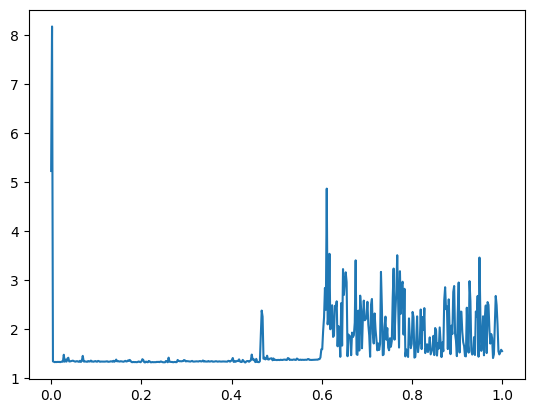

In [174]:
vertical_intensity_profile = digital_knife_edge(slm, camera, orientation='vertical', exposure_time=25000, steps=500, i_j=1, grating_period=6)

Fitted parameters:
Amplitude = 1.4827
Center = 1249.8098
Sigma = 8.2401
Offset = 1.6468


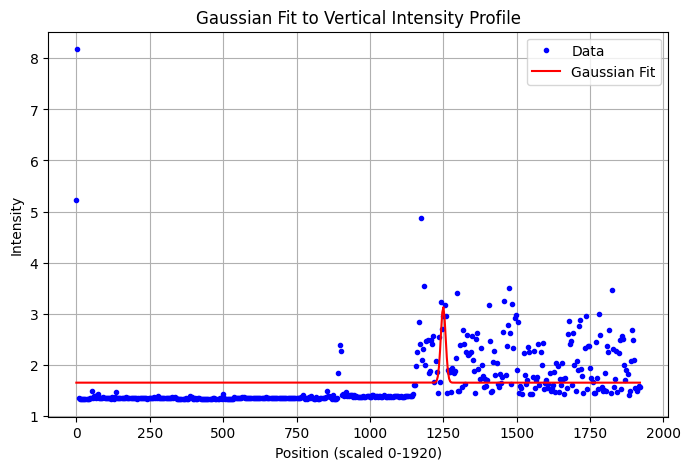

In [175]:
from scipy.optimize import curve_fit
import numpy as np

import matplotlib.pyplot as plt

# Gaussian model
def gaussian(x, a, x0, sigma, offset):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2)) + offset

# Prepare x and y data
x_values = np.linspace(0, 1920, len(vertical_intensity_profile))
y_values = np.array(vertical_intensity_profile)

# Initial guess for parameters
p0 = [max(y_values), 1250, 10, min(y_values)]

# Fit
params, _ = curve_fit(gaussian, x_values, y_values, p0=p0)
a, x0, sigma, offset = params
fitted_curve = gaussian(x_values, *params)
x_center = x0
#y_center = x0
x_sigma = sigma
#y_sigma = sigma

print(f"Fitted parameters:\nAmplitude = {a:.4f}\nCenter = {x0:.4f}\nSigma = {sigma:.4f}\nOffset = {offset:.4f}")

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x_values, y_values, 'b.', label="Data")
plt.plot(x_values, fitted_curve, 'r-', label="Gaussian Fit")
plt.xlabel("Position (scaled 0-1920)")
plt.ylabel("Intensity")
plt.legend()
plt.title("Gaussian Fit to Vertical Intensity Profile")
plt.grid(True)
plt.show()

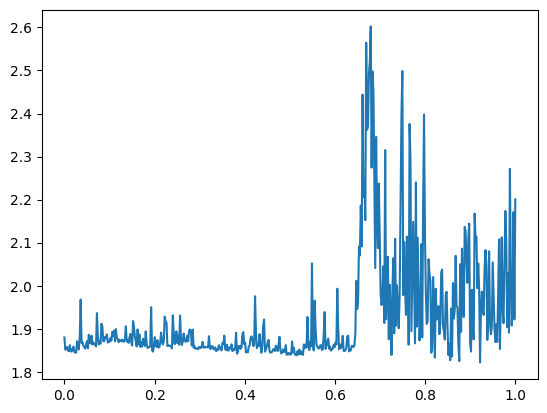

In [165]:
horizontal_intensity_profile = digital_knife_edge(slm, camera, orientation='horizontal', exposure_time=50000, steps=500, i_j=1, grating_period=3)


Fitted parameters:
Amplitude = 0.5489
Center = 731.3295
Sigma = 15.5567
Offset = 1.9072


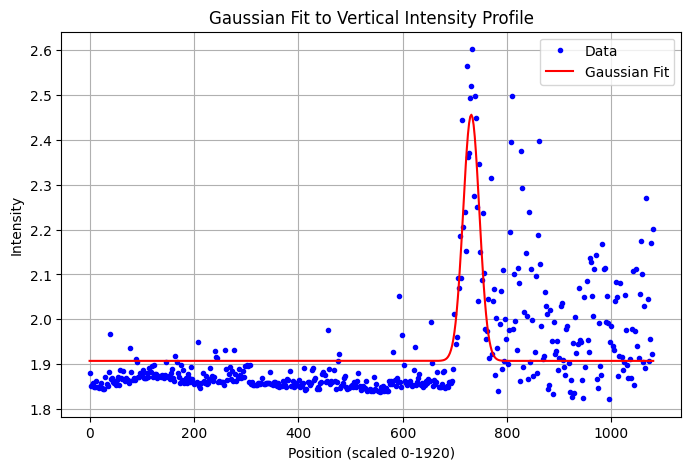

In [166]:
from scipy.optimize import curve_fit
import numpy as np

import matplotlib.pyplot as plt

# Gaussian model
def gaussian(x, a, x0, sigma, offset):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2)) + offset

# Prepare x and y data
x_values = np.linspace(0, 1080, len(horizontal_intensity_profile))
y_values = np.array(horizontal_intensity_profile)

# Initial guess for parameters
p0 = [np.max(y_values), 700, 22, min(y_values)]

# Fit
params, _ = curve_fit(gaussian, x_values, y_values, p0=p0)
a, x0, sigma, offset = params
fitted_curve = gaussian(x_values, *params)

print(f"Fitted parameters:\nAmplitude = {a:.4f}\nCenter = {x0:.4f}\nSigma = {sigma:.4f}\nOffset = {offset:.4f}")
y_center = x0
y_sigma = sigma 
# Plot
plt.figure(figsize=(8, 5))
plt.plot(x_values, y_values, 'b.', label="Data")
plt.plot(x_values, fitted_curve, 'r-', label="Gaussian Fit")
plt.xlabel("Position (scaled 0-1920)")
plt.ylabel("Intensity")
plt.legend()
plt.title("Gaussian Fit to Vertical Intensity Profile")
plt.grid(True)
plt.show()

In [9]:
x_coordinate_center = (1250 - 75 - 1920/2)*0.008

y_coordinate_center = (731 -10 - 1080/2)*0.008



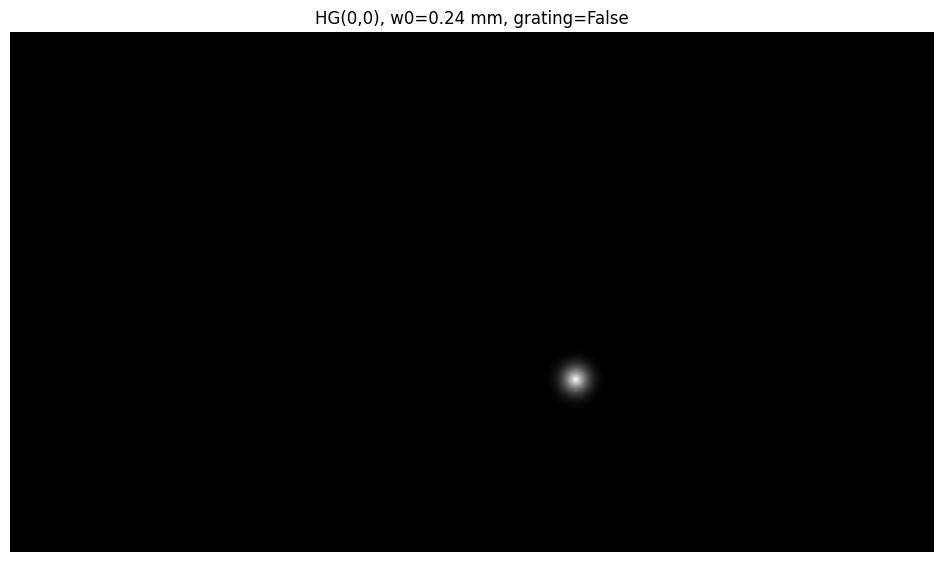

In [10]:
modemask = generate_hg_hologram(0,0, 15*0.016, (x_coordinate_center, y_coordinate_center), Grating= False, Grating_period=(0, 50), conjugate=False, plot_output= True)


In [11]:
slm.showPhaseData(modemask)

0

In [43]:
slm.showPhaseData(no_grating)

0

In [189]:
ref_picture = capture_single_image(camera, exposure_time=50000)
ref_intensity = np.mean(ref_picture)



In [12]:
intensity_plot = np.zeros((101, 101))

for dx in range(-50, 51):
    for dy in range(-50, 51):
        shifted = np.roll(modemask, shift=(dy, dx), axis=(0, 1))
        slm.showImageData(shifted)
        # img = capture_single_image(camera, exposure_time=50000)
        # intensity_plot[dy + 50, dx + 50] = np.mean(img)
        # #time.sleep(0.1)



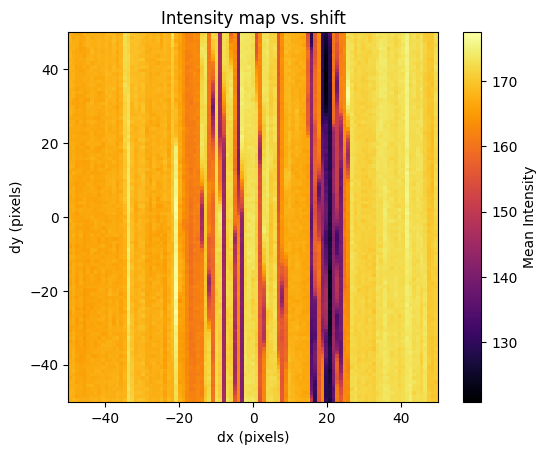

In [194]:
import matplotlib.pyplot as plt

plt.imshow(intensity_plot, cmap="inferno", origin="lower",
           extent=[-50, 50, -50, 50])
plt.colorbar(label="Mean Intensity")
plt.xlabel("dx (pixels)")
plt.ylabel("dy (pixels)")
plt.title("Intensity map vs. shift")
plt.show()


<Figure size 800x600 with 0 Axes>

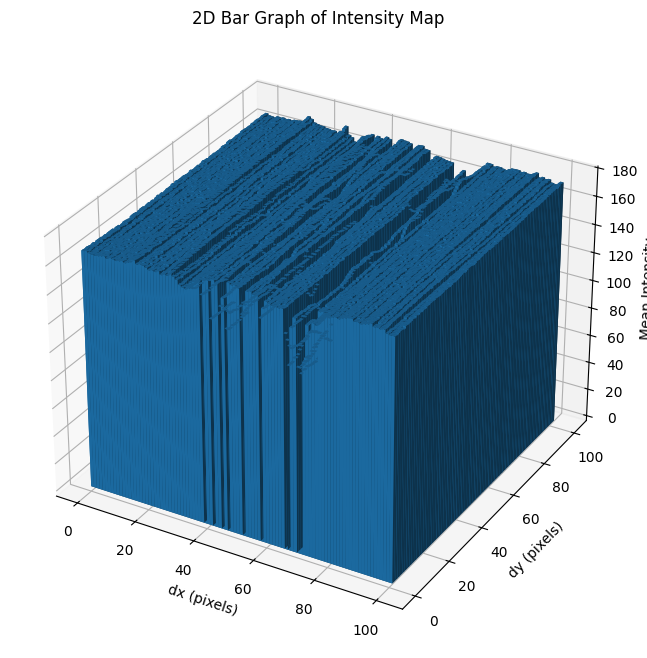

In [195]:
import numpy as np

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
x = np.arange(intensity_plot.shape[1])
y = np.arange(intensity_plot.shape[0])
X, Y = np.meshgrid(x, y)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(X.ravel(), Y.ravel(), np.zeros_like(intensity_plot.ravel()), 1, 1, intensity_plot.ravel(), shade=True)
ax.set_xlabel('dx (pixels)')
ax.set_ylabel('dy (pixels)')
ax.set_zlabel('Mean Intensity')
ax.set_title('2D Bar Graph of Intensity Map')
plt.show()

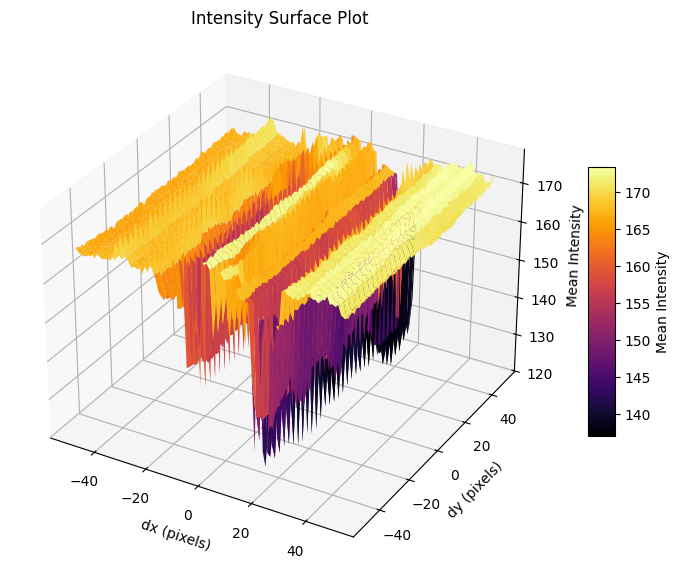

In [196]:
import numpy as np
import matplotlib.pyplot as plt

# assuming intensity_plot is your (101x101 or 100x100) array

# Create shift ranges centered around 0
def centered_range(n):
    start = - (n // 2)
    end_exclusive = start + n
    return np.arange(start, end_exclusive)

h, w = intensity_plot.shape
xs = centered_range(w)
ys = centered_range(h)
X, Y = np.meshgrid(xs, ys)

Z = intensity_plot

# Plot surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap="inferno", edgecolor="none")

ax.set_xlabel("dx (pixels)")
ax.set_ylabel("dy (pixels)")
ax.set_zlabel("Mean Intensity")
ax.set_title("Intensity Surface Plot")

fig.colorbar(surf, shrink=0.5, aspect=10, label="Mean Intensity")
plt.show()


In [5]:
mag = np.linspace(0,2,100)
for m in mag:
    modemask = generate_hg_hologram(0,0, m*15*0.016, (x_coordinate_center, y_coordinate_center), Grating= False, Grating_period=(500, 0), conjugate=True, plot_output= False)
    slm.showPhaseData(modemask)


TypeError: generate_hg_hologram() got an unexpected keyword argument 'Grating'

In [12]:
ans = generate_hg_hologram(H=1920, V=1080, pixel_pitch=8e-3, wavelength=532e-6, w0=100, z=0.0, n=4, m=0, gx=0.0, gy=0.0, center=(x_coordinate_center, y_coordinate_center))

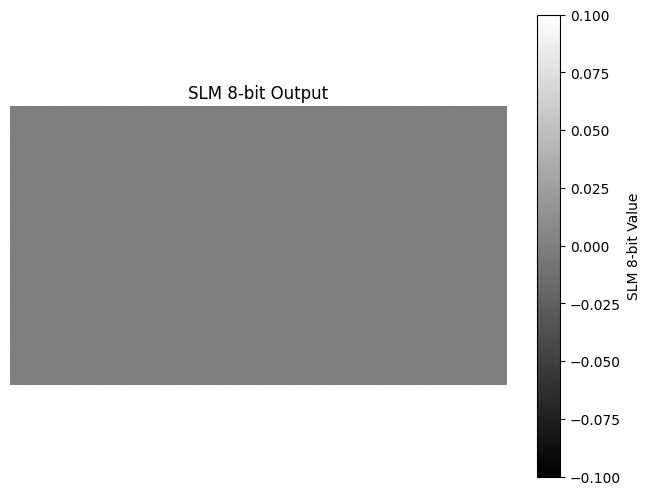

In [13]:
import matplotlib.pyplot as plt

slm_8bit = ans['slm_8bit']

plt.figure(figsize=(8, 6))
plt.imshow(slm_8bit, cmap='gray')
plt.colorbar(label='SLM 8-bit Value')
plt.title('SLM 8-bit Output')
plt.axis('off')
plt.show()

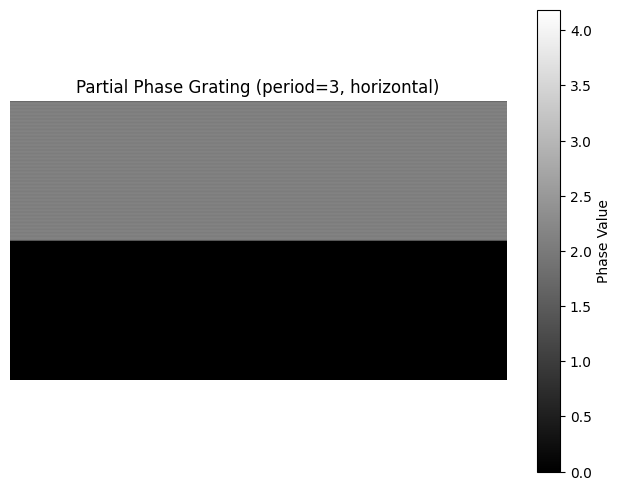

In [ ]:
partial_phase = partial_grating_phase(grating_period=3, direction='horizontal', coverage_fraction=0.5)
partial_phase = (partial_phase + 1) * 127.5  # Scale to [0, 255] for visualization
plt.figure(figsize=(8, 6))
plt.imshow(partial_phase, cmap='gray')
plt.colorbar(label='Phase Value')
plt.title('PartiPhase Grating (period=3, horizontal)')
plt.axis('off')
plt.show()

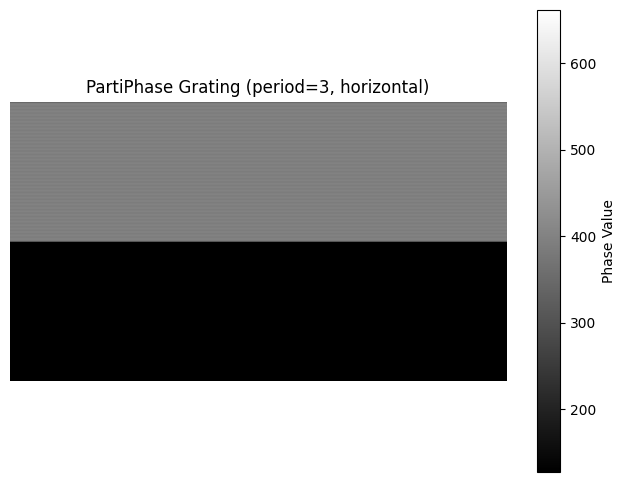

In [ ]:
partial_phase = partial_grating_phase(grating_period=3, direction='horizontal', coverage_fraction=0.5)
partial_phase = (partial_phase + 1) * 127.5  # Scale to [0, 255] for visualization
plt.figure(figsize=(8, 6))
plt.imshow(partial_phase, cmap='gray')
plt.colorbar(label='Phase Value')
plt.title('Partial Phase Grating (period=3, horizontal)')
plt.axis('off')
plt.show()